# UK Net Zero

#### Introduction

#### What are emissions? [^1], [^2], [^3], [^4], [^5], [^6]
Emissions refer to the the pollutans humans release in the atmosphere through their activities. These range from greenhouse gases (such as CO2, HFC or methane), air pollutants (CO, black smoke or benzene), heavy metals (arsenic, mercury or lead) or particulate matter (PM10, PM2.5, PM1 or PM0.1).

Carbon is usually the main reference to emissions in the media. That is mainly because 5 million metric tons of carbon produced by humans remains in the atmosphere each year. This raises the global average of CO2 by 2.3 part per million every year. This means that, since 1750, humans have increased the amount of CO2 in the atmosphere by 50%. 

The Kyoto Protocol, which entered into force in 2005, establishes the [UN Framework Convention on Climate Change](https://unfccc.int/process-and-meetings/the-convention/what-is-the-united-nations-framework-convention-on-climate-change) for industrialised economies to limit and reduce their greenhouse gases emissions. 

Besides CO2, methane (CH4) is also worth mentioning. This is a powerful greenhouse gas and its main source (from human activity) comes from agriculture. Compared to CO2, methane has a relatively short atmospheric lifetime (around 12 years, versus hundreds of years for CO2), but it absorbs more energy during its lifetime. 

The latest IPCC report discusses CH4 at length and mentions that “strong, rapid and sustained reductions in CH4 emissions would also limit the warming effect resulting from declining aerosol pollution and would improve air quality.”

While CO2 is the main culprit behind climate change, the same IPCC study suggest that 30-50% of temperature rises are caused by CH4. In simpler terms, while methane dissipates quite quickly from the atmosphere, it is accentuating the effects of CO2 on climate change.


#### What is net zero? Net vs gross zero [^10]

Although a broad term, this has been highly used in the public space over the past few years and more so recently. It refers to the reduction of greenhouse gas emissions combined with the removal of such gases from the atmosphere.

This is in contrast to gross zero, which refers to reducing all greenhouse gas emissions to zero. Net zero recognises this is a potentially unrealistic goal, as some industries will continue to emit such gases.

To allow net zero to be a viable route, the gases emitted by more polluting industries will need to be offset, through means such as natural carbon sinks or as artificial carbon sinks. As research into these artifical technologies is ongoing, the focus is on using natural carbon sinks to capture these gases, using, for e.g., oceans and forests.

When the carbon produced is cancelled out by the carbon removed, the UK will be a net zero emitter, which becomes easier as emissions lower further down.

#### How are emissions data collected, by whom and how often?

In the UK, the Office for National Statistics publishes the UK National Accounts on a yearly basis: [UK National Accounts, The Blue Book: 2020](https://www.ons.gov.uk/economy/grossdomesticproductgdp/compendium/unitedkingdomnationalaccountsthebluebook/2020). Although Environmental Accounts are "satelitte accounts" (meaning that they cover activities linked to the economy but are not part of the core UK national accounts), these do include information on atmospheric emissions, alongside others. The [latest emissions dataset](https://www.ons.gov.uk/economy/environmentalaccounts/datasets/ukenvironmentalaccountsatmosphericemissionsgreenhousegasemissionsbyeconomicsectorandgasunitedkingdom), titled "Atmospheric emissions: greenhouse gases by industry and gas" was published by the ONS on the 3rd of June 2021 and it includes data for the years 1990 to 2019.

The information is collected by [Ricardo Energy & Environment](https://ee.ricardo.com/) for the ONS.

The work in this notebook is based on the "Atmospheric emissions: greenhouse gases by industry and gas" dataset aforementioned. This dataset is split into eight different sections - an aggregate of greenhouse emissions and then by seven substances emitted into the atmosphere. The rest of the notebook is based on the data related to carbon dioxide (CO2) emissions.

#### UK's net zero targets 

"The UK government will set the world’s most ambitious climate change target into law to reduce emissions by 78% by 2035 compared to 1990 levels, it was announced today (Tuesday 20 April)." [^10]

[^1]: https://www.climate.gov/news-features/climate-qa/are-humans-causing-or-contributing-global-warming#:~:text=A%20net%205%20billion%20metric,atmosphere%20by%20nearly%2050%20percent.
[^2]: https://naei.beis.gov.uk/data/data-selector?view=pms
[^3]: https://www.instituteforgovernment.org.uk/explainers/net-zero-target
[^4]: https://www.iea.org/reports/methane-tracker-2020
[^5]: https://www.ipcc.ch/report/ar6/wg1/
[^6]: https://grist.org/article/un-report-ipcc-methane-cows-oil/

[^10]: https://www.gov.uk/government/news/uk-enshrines-new-target-in-law-to-slash-emissions-by-78-by-2035

### Aggregated CO2 emissions

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [116]:
df_co2 = pd.read_excel("data_sources/atmos_emis_ghg.xlsx", sheet_name="CO2")

In [117]:
temp_frame = df_co2.copy(deep=True).iloc[[2, 25]]
temp_frame.reset_index();
temp_frame.drop(columns=temp_frame.columns[:3], inplace=True)

In [118]:
transposed_overview = temp_frame.transpose(copy=True)
transposed_overview.rename(columns={2: "Year", 25: "CO2e"}, inplace=True)
transposed_overview.reset_index(drop=True);
transposed_overview['Year'] = transposed_overview['Year'].astype('int')

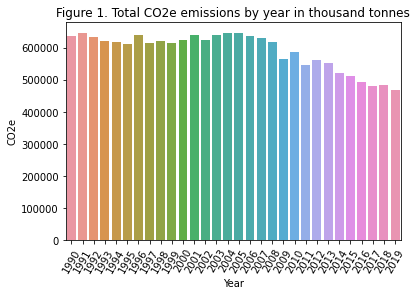

In [119]:
graph = sns.barplot(
    x="Year",
    y="CO2e",
    data=transposed_overview
)

graph.set_xticklabels(graph.get_xticklabels(), rotation=60);
graph.set_title("Figure 1. Total CO2e emissions by year in thousand tonnes");

In [120]:
transposed_overview['pct_change'] = transposed_overview.CO2e.pct_change()

In [121]:
max_diff_positive_row_name = transposed_overview['pct_change'].idxmax()
max_diff_positive_row = transposed_overview.loc[max_diff_positive_row_name,:]
max_diff_row

Year              1996
CO2e          637549.4
pct_change    0.044992
Name: Unnamed: 9, dtype: object

In [122]:
max_diff_negative_row_name = transposed_overview['pct_change'].idxmin()
max_diff_negative_row = transposed_overview.loc[max_diff_negative_row_name,:]
max_diff_negative_row

Year              2009
CO2e          564075.8
pct_change    -0.08632
Name: Unnamed: 22, dtype: object

In [123]:
transposed_overview['pct_change'].mean()

-0.010104327184030001

Figure 1 above shows the quantity of CO2e emitted in the UK every year from 1990 to 2019.

For the period 1990 to 2019, the CO2 emissions in the UK fell, on average, 1.01% year-on-year.

The largest increase YoY in CO2 emissions was recorded in 1996, namely a 4.49% increase on 1995 levels.

The largest decrease YoY in CO2 emissions was recorded in 2009, where the levels of carbon dioxide emissions decreased by 8.63% compared to 2008 levels.

---
UK's Net Zero strategy requires a reduction of emissions to 78% of 1990 levels by 2035. Following the average of 1.01% YoY reduction in emissions (and thereby assuming nothing will change and thus everything remains as it is), we can work out the emissions the UK is due to produce over the next 14 years.

In [162]:
last_value_in_emissions = transposed_overview.at['Back to contents', 'CO2e']
next_sixteen_yrs_emissions = []
for i in range(16):
    last_value_in_emissions = last_value_in_emissions + transposed_overview['pct_change'].mean() * last_value_in_emissions
    next_sixteen_yrs_emissions.append(last_value_in_emissions)

In [163]:
next_sixteen_yrs_emissions

[463544.3860835712,
 458860.5819422625,
 454224.10449046345,
 449634.47552381875,
 445091.22166990634,
 440593.874339414,
 436141.96967780916,
 431735.04851749726,
 427372.6563304634,
 423054.3431813924,
 418779.6636812627,
 414548.1769414092,
 410359.44652805,
 406213.0404172731,
 402108.5309504774,
 398045.4947902641]

In [167]:
next_sixteen_yrs_df = pd.DataFrame(data={"Year": list(range(2020, 2036)), "CO2e": next_sixteen_yrs_emissions})

In [168]:
next_sixteen_yrs_df

,Year,CO2e
0,2020,463544.386084
1,2021,458860.581942
2,2022,454224.104490
3,2023,449634.475524
4,2024,445091.221670
5,2025,440593.874339
6,2026,436141.969678
7,2027,431735.048517
8,2028,427372.656330
9,2029,423054.343181


In [170]:
# 1990's emissions: 637165.2 Thousand Tonnes
transposed_overview.reset_index().at[0, "CO2e"]

# 78% of 637165.2
78/100 * 637165.2

496988.85599999997

From the above approximation, based on a year-on-year reduction in emissions of ~1.01%, the UK should be able to reach its Net Zero goals (78% of 1990's emissions levels) by 2035.

It is important to point out this approximation is incomplete and it is not accounting for different changes in the UK. As the next section will show, there are industries where the CO2 emissions have steadily increasing for the past few years. Moreover, these figures are dependant on many factors, for example, population numbers. 

---
### By industry

In [155]:
industries = df_co2.copy(deep=True).iloc[list(range(2,24))]
industries.reset_index();
industries.drop(columns=industries.columns[:2], inplace=True)
industries = industries.transpose(copy=True)
industries.columns = industries.iloc[0]
industries.drop(industries.index[0], inplace=True)
industries.rename(columns={np.nan: "Year"}, inplace=True)
industries.reset_index(drop=True);
industries['Year'] = industries['Year'].astype('int')

In [156]:
labels = list(industries.columns)[1:]

/var/folders/fq/p9v5h3gd76d1vkj5rhzqhyjw0000gn/T/ipykernel_9431/806349679.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


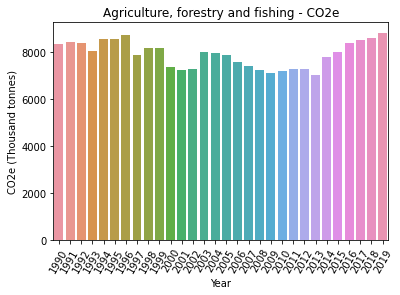

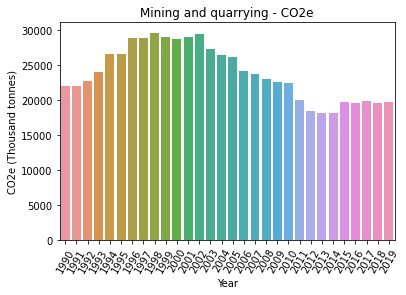

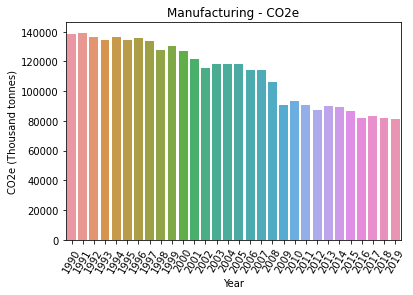

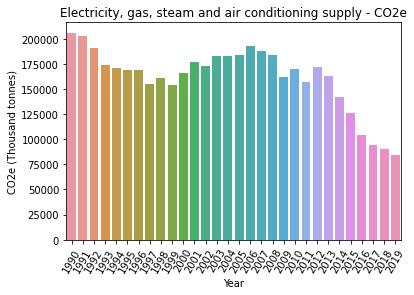

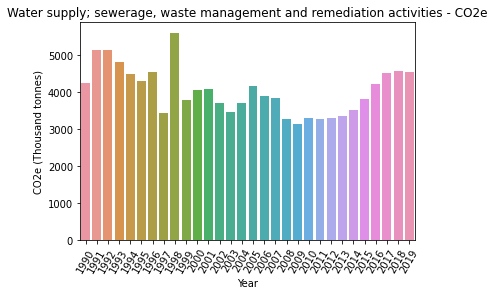

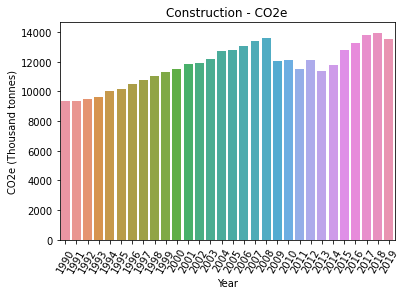

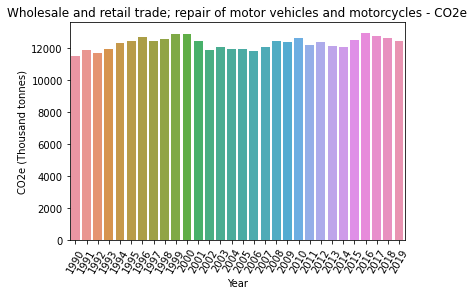

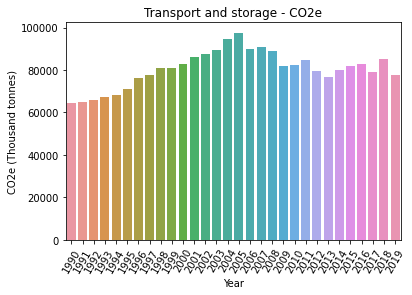

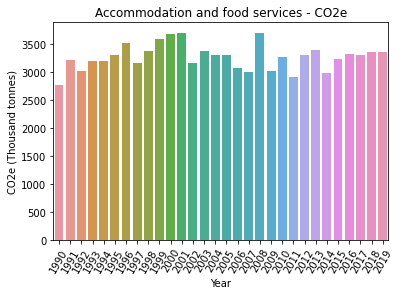

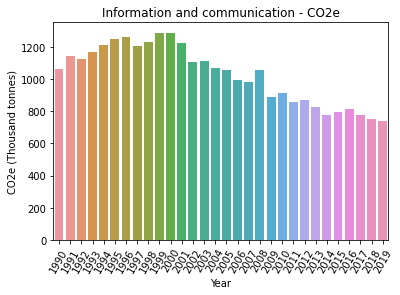

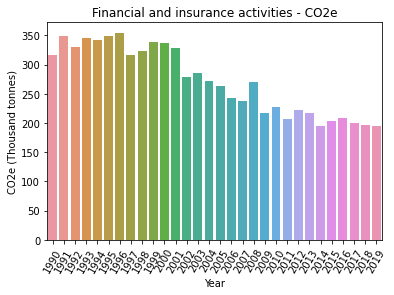

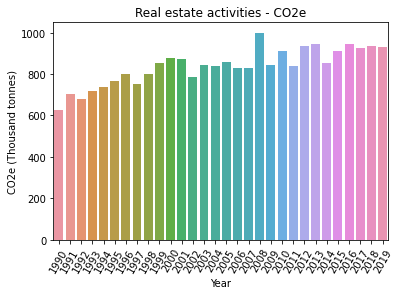

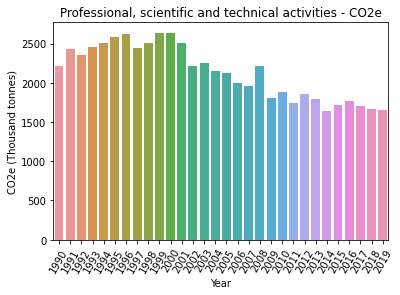

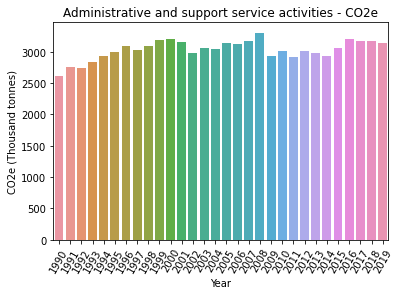

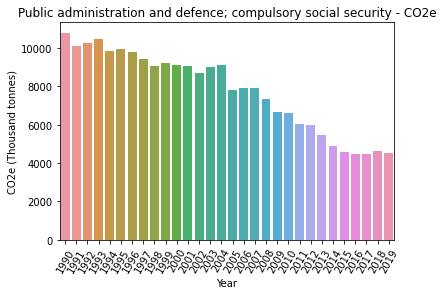

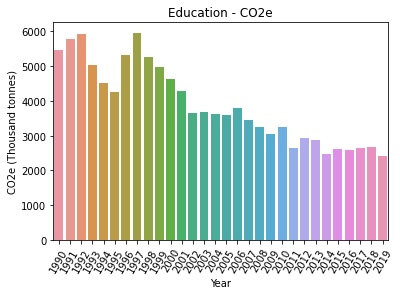

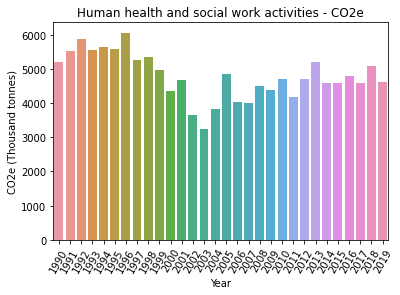

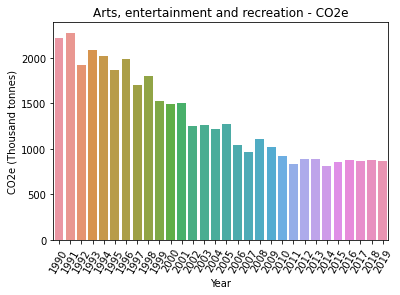

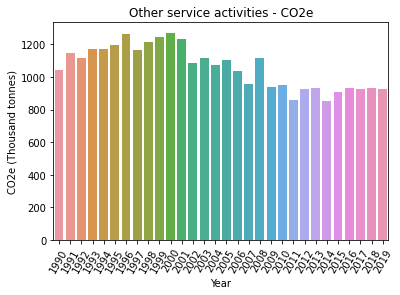

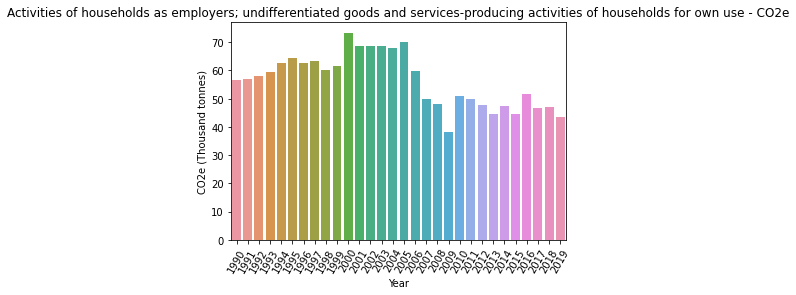

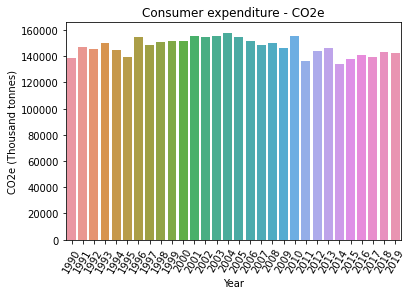

In [157]:
for label in labels:
    plt.figure()
    graph = sns.barplot(
    x="Year",
    y=label,
    data=industries
)
    graph.set_title(f"{label} - CO2e")
    graph.set_ylabel("CO2e (Thousand tonnes)")
    graph.set_xticklabels(graph.get_xticklabels(), rotation=60);